Part 1 – Data Preparation and Preprocessing.

Importing libraries

In [42]:
import pandas as pd

##### Reading the data

In [43]:
data = pd.read_csv("data.csv") 

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
data.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


### Part 1 – Data Preparation and Preprocessing

##### Describe the dataset (e.g.: type of column, value range)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [46]:
data.describe(include='all')

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
count,318477.0,318477,306473,318477,197229,122658,197229,197229,318470,302302,318477.000000,318477.000000,302379
unique,318477.0,168065,40628,163,65,19,30,338,234287,250901,NaN,NaN,4
top,37404348.0,Project Manager,Jora Local,2018-10-17T00:00:00.000Z,Sydney,CBD & Inner Suburbs,Information & Communication Technology,Other,Whether they’re racing to fill shelves or scan...,"<p><strong>At ALDI, our people are the key to ...",NaN,NaN,Full Time
freq,1.0,1298,9354,13059,60765,32170,22796,11349,312,212,NaN,NaN,201225
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.813544,114.432342,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.063125,177.594941,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,40.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,70.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,120.000000,NaN


##### How many records are there in the dataset?

In [47]:
print("There are",data.shape[0], "rows in the dataset")

There are 318477 rows in the dataset


##### Which period does it cover? How many different dates have job postings?

In [48]:
data["Date"] = pd.to_datetime(data["Date"])

In [49]:
print("The data covers the period starting from", min(data["Date"]).date(),"to", max(data["Date"]).date())

The data covers the period starting from 2018-10-01 to 2019-03-13


In [50]:
data["Date"].value_counts()

2018-10-17 00:00:00+00:00    13059
2018-12-14 00:00:00+00:00    11505
2019-01-22 00:00:00+00:00     9544
2019-01-10 00:00:00+00:00     8736
2018-10-31 00:00:00+00:00     8641
                             ...  
2019-03-03 00:00:00+00:00        3
2018-11-14 00:00:00+00:00        2
2019-01-25 00:00:00+00:00        2
2019-03-10 00:00:00+00:00        2
2019-03-09 00:00:00+00:00        1
Name: Date, Length: 163, dtype: int64

##### How many locations does the dataset have? Which location has the most job postings?

In [51]:
print("There are", len(data["Location"].value_counts()), "locations in the dataset")

There are 65 locations in the dataset


In [52]:
data["Location"].value_counts()

Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64

In [53]:
print("Sydney has the most number of job postings")

Sydney has the most number of job postings


##### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [54]:
print("There are", len(data["Classification"].value_counts()), "Classifications in the dataset")

There are 30 Classifications in the dataset


In [55]:
data["Classification"].value_counts()

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

##### Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

In [56]:
science_and_tech_data = data[data["Classification"]=="Science & Technology"]

In [57]:
print("There are", len(science_and_tech_data["SubClassification"].value_counts()), "Sub-sectors in the dataset")

There are 11 Sub-sectors in the dataset


In [58]:
science_and_tech_data["SubClassification"].value_counts()

Environmental, Earth & Geosciences                197
Laboratory & Technical Services                   167
Mathematics, Statistics & Information Sciences    121
Other                                              97
Biological & Biomedical Sciences                   82
Quality Assurance & Control                        80
Chemistry & Physics                                63
Food Technology & Safety                           46
Biotechnology & Genetics                           23
Materials Sciences                                 15
Modelling & Simulation                             14
Name: SubClassification, dtype: int64

##### List the job types. In each job type, what are the lowest salary and highest salary?

In [59]:
data.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [60]:
data["Salary Range"] = data["LowestSalary"].astype("string") + "-" + data["HighestSalary"].astype("string")

In [61]:
data["Salary Range"].value_counts()

0-30       62639
40-50      34436
70-80      28712
60-70      28499
100-120    27673
50-60      27027
150-200    25841
120-150    24514
80-100     24249
30-40      23476
200-999    11411
Name: Salary Range, dtype: Int64

In [62]:
data['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [63]:
job_types = list(data['JobType'].unique())[1:]
for job in job_types:
  print("The  lowest salary for",job,"is",data[data["JobType"] == job]['LowestSalary'].min())
  print("The  highest salary for",job,"is", data[data["JobType"] == job]['HighestSalary'].max())

The  lowest salary for Full Time is 0
The  highest salary for Full Time is 999
The  lowest salary for Contract/Temp is 0
The  highest salary for Contract/Temp is 999
The  lowest salary for Part Time is 0
The  highest salary for Part Time is 999
The  lowest salary for Casual/Vacation is 0
The  highest salary for Casual/Vacation is 999


In [144]:
print(data.LowestSalary)

0           0
1           0
2           0
3           0
4           0
         ... 
318472    200
318473    200
318474    200
318475    200
318476    200
Name: LowestSalary, Length: 318369, dtype: int64


Average Salary for each JobType

In [64]:
data["Average Salary"] = (data["LowestSalary"] + data["HighestSalary"])/2

In [66]:
data.Id

0         37404348
1         37404337
2         37404356
3         37404330
4         37404308
            ...   
318472    38564891
318473    38564940
318474    38552964
318475    38534438
318476    38561751
Name: Id, Length: 318477, dtype: object

In [79]:
data["Id_length"] = data["Id"].apply(lambda x: len(str(x)))

In [82]:
data.loc[data.Id_length!=8].head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11 00:00:00+00:00,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,0-30,15.0,64
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11 00:00:00+00:00,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,0-30,15.0,64


#### Removing inconsistencies

In [83]:
data['Id'] = data['Id'].apply(lambda x: str(x)[0:8])

#### Extract date from date time object

In [90]:
data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [93]:
# data['Date'] = data['Date'].dt.date

In [96]:
data['Id']=pd.to_numeric(data['Id'])

In [97]:
data['Date']=pd.to_datetime(data['Date'])
data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 318477 non-null  int64         
 1   Title              318477 non-null  object        
 2   Company            306473 non-null  object        
 3   Date               318477 non-null  datetime64[ns]
 4   Location           197229 non-null  object        
 5   Area               122658 non-null  object        
 6   Classification     197229 non-null  object        
 7   SubClassification  197229 non-null  object        
 8   Requirement        318470 non-null  object        
 9   FullDescription    302302 non-null  object        
 10  LowestSalary       318477 non-null  int64         
 11  HighestSalary      318477 non-null  int64         
 12  JobType            302379 non-null  object        
 13  Salary Range       318477 non-null  string  

In [35]:
data.loc[data['Id']==37915007]

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary
154045,37915007,Early Childhood Educator - Casual,G8 Education,2018-12-11,Sydney,Parramatta & Western Suburbs,Education & Training,Childcare & Outside School Hours Care,"Develop your future with G8 Education, we prom...",NaN,0,30,NaN,0-30,15.0
154047,37915007,Early Childhood Educator - Casual,G8 Education,2018-12-11,Sydney,Parramatta & Western Suburbs,Education & Training,Childcare & Outside School Hours Care,"Develop your future with G8 Education, we prom...",NaN,0,30,NaN,0-30,15.0


In [99]:
data_duplicates=data[data.duplicated()]

In [103]:
print(data_duplicates.shape)

(108, 16)


In [105]:
data.shape

(318477, 16)

In [106]:
data.drop_duplicates(inplace=True)

In [107]:
data.shape

(318369, 16)

Check missing data

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# get the sum of isna() in each column

missing_data=data.isna().sum()
missing_data

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
Salary Range              0
Average Salary            0
Id_length                 0
dtype: int64

In [113]:
missing_values=missing_data.tolist()
missing_columns=missing_data.index.tolist()

[Text(0.5, 1.0, 'missing data')]

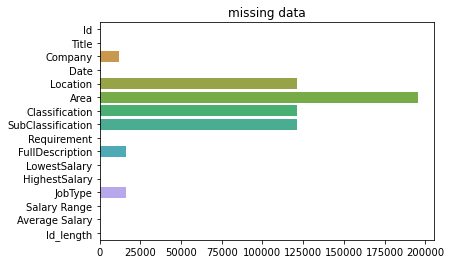

In [131]:
import seaborn as sns
import matplotlib as plt

sns.barplot(x=missing_values , y = missing_columns).set(title="missing data")

Part 2 – Data Understanding

In [124]:
data["Salary Range"].value_counts()

0-30       62586
40-50      34431
70-80      28706
60-70      28495
100-120    27669
50-60      27018
150-200    25833
120-150    24506
80-100     24249
30-40      23471
200-999    11405
Name: Salary Range, dtype: Int64

In [125]:
data["Average Salary"]

0          15.0
1          15.0
2          15.0
3          15.0
4          15.0
          ...  
318472    599.5
318473    599.5
318474    599.5
318475    599.5
318476    599.5
Name: Average Salary, Length: 318369, dtype: float64

Text(0.5, 1.0, 'Job distribution by average salary')

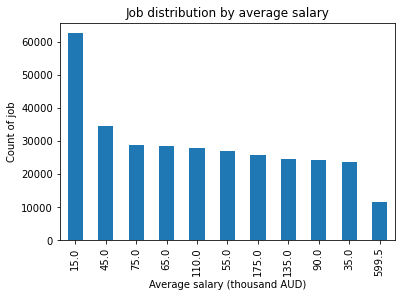

In [146]:
data["Average Salary"].value_counts().plot(kind='bar')
plt.ylabel('Count of job')
plt.xlabel('Average salary (thousand AUD)')
plt.title("Job distribution by average salary")

In [159]:
data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [177]:
data.JobType.unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [181]:
data["JobType"].value_counts()

Full Time          201172
Contract/Temp       53897
Casual/Vacation     25353
Part Time           21889
Name: JobType, dtype: int64

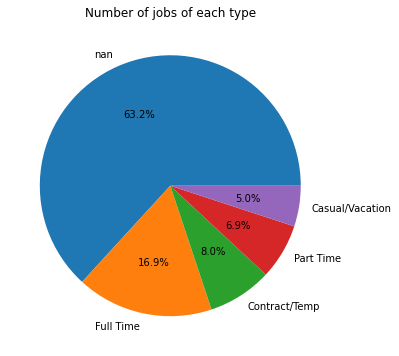

In [189]:
fig = plt.figure(figsize = (6,6))

plt.pie(data["JobType"].value_counts(dropna=False), labels=data.JobType.unique(), autopct='%1.1f%%')
plt.title("Number of jobs of each type")
plt.show()

In [191]:
data.Classification.unique()

array(['Retail & Consumer Products', 'Call Centre & Customer Service',
       'Hospitality & Tourism', 'Banking & Financial Services',
       'Manufacturing, Transport & Logistics', 'Sales',
       'Administration & Office Support', 'Trades & Services',
       'Accounting', 'Real Estate & Property', 'Healthcare & Medical',
       'Marketing & Communications', 'Government & Defence',
       'Information & Communication Technology', 'Education & Training',
       'Community Services & Development', 'Mining, Resources & Energy',
       'Human Resources & Recruitment', 'Insurance & Superannuation',
       'Engineering', 'CEO & General Management', 'Design & Architecture',
       'Legal', 'Construction', 'Sport & Recreation',
       'Science & Technology', 'Advertising, Arts & Media',
       'Farming, Animals & Conservation', 'Self Employment',
       'Consulting & Strategy', nan], dtype=object)

In [211]:
data.Classification.value_counts().sort_values(ascending=False)

Information & Communication Technology    22787
Trades & Services                         17966
Healthcare & Medical                      17068
Hospitality & Tourism                     15513
Manufacturing, Transport & Logistics      12372
Administration & Office Support           10017
Accounting                                 9365
Education & Training                       9272
Construction                               8369
Sales                                      8112
Retail & Consumer Products                 8040
Government & Defence                       7435
Engineering                                6453
Mining, Resources & Energy                 6286
Banking & Financial Services               4632
Community Services & Development           4484
Legal                                      4232
Human Resources & Recruitment              4140
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

In [215]:
count = data.Classification.value_counts().key()

# plt.barh(data.Classification.value_counts())

# plt.title("Number of jobs of each type")
# plt.show()

AttributeError: 'Series' object has no attribute 'key'